<a href="https://colab.research.google.com/github/RithikaSamraj/guvi/blob/main/breast_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
store=files.upload()

Saving data.csv to data.csv


In [ ]:
data=pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Preprocessing
data = data.drop(['id', 'Unnamed: 32'], axis=1)  # Drop irrelevant columns
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})  # Encode target variable


In [ ]:
# Features and target
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict on test set
y_pred = clf.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



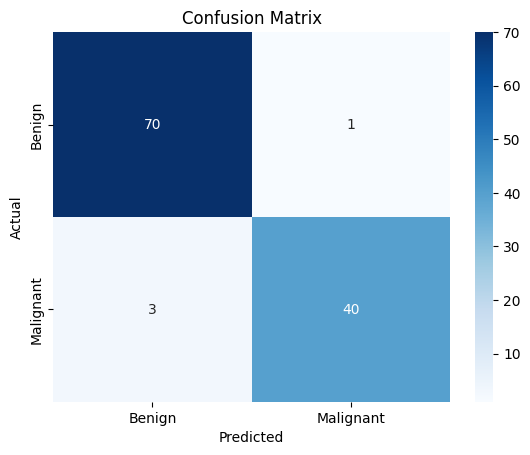

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


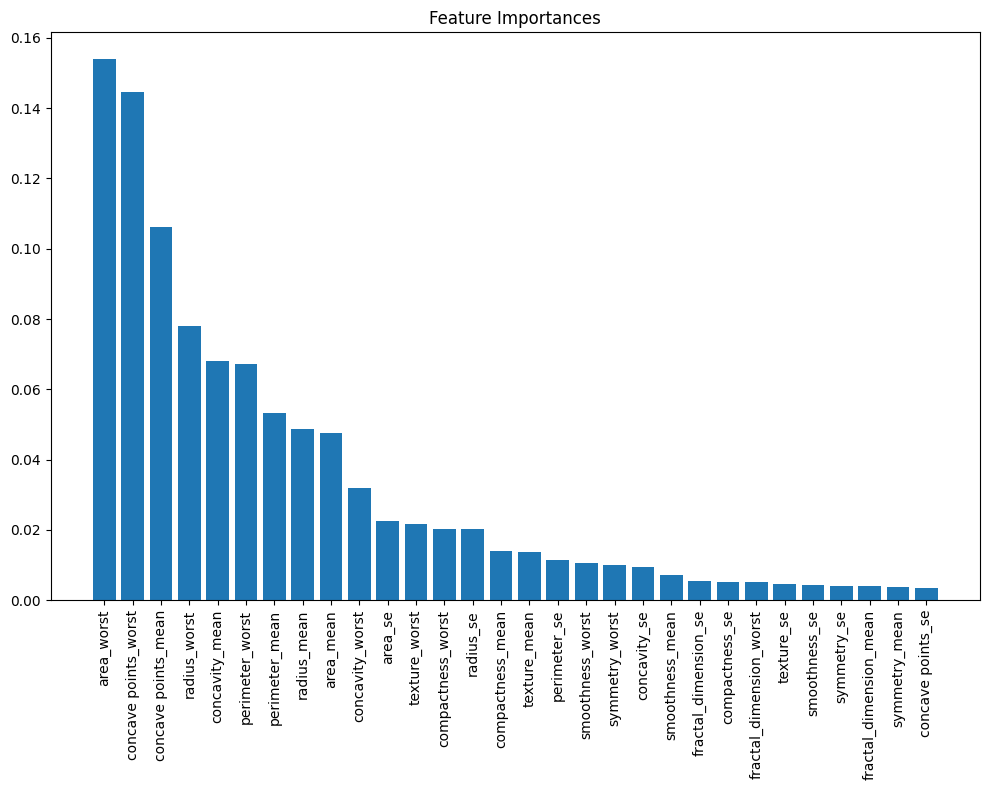

In [ ]:
# Feature importance
importances = clf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
# Predict based on manual user input
def predict_from_input():
    print("\nEnter the following values to make a prediction:")
    user_data = {
        'radius_mean': float(input("Enter mean radius: ")),
        'texture_mean': float(input("Enter mean texture: ")),
        'perimeter_mean': float(input("Enter mean perimeter: ")),
        'area_mean': float(input("Enter mean area: ")),
        'smoothness_mean': float(input("Enter mean smoothness: ")),
        'compactness_mean': float(input("Enter mean compactness: ")),
        'concavity_mean': float(input("Enter mean concavity: ")),
        'concave points_mean': float(input("Enter mean concave points: ")),
        'symmetry_mean': float(input("Enter mean symmetry: ")),
        'fractal_dimension_mean': float(input("Enter mean fractal dimension: "))
    }

    # Convert input to dataframe with the same feature names as training data
    user_df = pd.DataFrame([user_data], columns=X.columns)
    prediction = clf.predict(user_df)
    probability = clf.predict_proba(user_df)

    print("\nPrediction:", "Malignant" if prediction[0] == 1 else "Benign")
    print("Confidence:", f"{probability[0][prediction[0]] * 100:.2f}%")
predict_from_input()


Enter the following values to make a prediction:
Enter mean radius: 13.03
Enter mean texture: 18.42
Enter mean perimeter: 523.8
Enter mean area: 0.08983
Enter mean smoothness: 0.03766
Enter mean compactness: 0.02562
Enter mean concavity: 0.1467
Enter mean concave points: 0.05863
Enter mean symmetry: 0.1839
Enter mean fractal dimension: 2.342

Prediction: Benign
Confidence: 62.00%
